In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Hotel_Reservation.csv')

# Display the first few rows
print(data.head())

  Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_

In [2]:
# Create a boolean mask to identify rows with faulty dates
faulty_dates = (data['arrival_year'] == 2018) & (data['arrival_month'] == 2) & (data['arrival_date'] == 29)

# Drop rows with faulty dates
data = data[~faulty_dates]

# Confirm the faulty rows are removed
print(data[(data['arrival_year'] == 2018) & (data['arrival_month'] == 2) & (data['arrival_date'] == 29)])

Empty DataFrame
Columns: [Booking_ID, no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, type_of_meal_plan, required_car_parking_space, room_type_reserved, lead_time, arrival_year, arrival_month, arrival_date, market_segment_type, repeated_guest, no_of_previous_cancellations, no_of_previous_bookings_not_canceled, avg_price_per_room, no_of_special_requests, booking_status]
Index: []


In [3]:
from sklearn.model_selection import train_test_split

# Separate the features (X) and the target variable (y)
X = data.drop('booking_status', axis=1)
y = data['booking_status']

# Encode the target variable
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Perform train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Print the shapes of the training and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (28990, 18)
X_test shape: (7248, 18)
y_train shape: (28990,)
y_test shape: (7248,)


The code below for feature engineering uses data but we want to work on the X_train and X_test datapoints


In [ ]:
#import pandas as pd
#import numpy as np

# Extract datetime features
#data['arrival_month'] = pd.to_datetime(data['arrival_date'], format='%Y-%m-%d').dt.month
#data['arrival_day'] = pd.to_datetime(data['arrival_date'], format='%Y-%m-%d').dt.day
#data['arrival_day_of_week'] = pd.to_datetime(data['arrival_date'], format='%Y-%m-%d').dt.day_name()
#data['is_weekend_arrival'] = np.where(data['arrival_day_of_week'].isin(['Saturday', 'Sunday']), 1, 0)

# Create duration features
#data['total_nights'] = data['no_of_weekend_nights'] + data['no_of_week_nights']
#data['stay_duration_category'] = pd.cut(data['total_nights'], bins=[-1, 3, 7, np.inf], labels=['short', 'medium', 'long'])

# One-hot encode categorical features
#data = pd.get_dummies(data, columns=['type_of_meal_plan', 'room_type_reserved'])

# Create guest type feature
#data['guest_type'] = np.where(data['no_of_adults'] == 1, 'solo', np.where(data['no_of_children'] == 0, 'couple', 'family'))

# ... (continue with other feature engineering steps) 

In [4]:
import pandas as pd
import numpy as np

# Create date_combined feature
X_train['date_combined'] = pd.to_datetime(
    X_train['arrival_year'].astype(str) + '-' + X_train['arrival_month'].astype(str) + '-' + X_train['arrival_date'].astype(str),
    format='%Y-%m-%d'
)
X_test['date_combined'] = pd.to_datetime(
    X_test['arrival_year'].astype(str) + '-' + X_test['arrival_month'].astype(str) + '-' + X_test['arrival_date'].astype(str),
    format='%Y-%m-%d'
)

# Create is_weekend_arrival feature
X_train['is_weekend_arrival'] = X_train['date_combined'].dt.day_name().isin(['Saturday', 'Sunday']).astype(int)
X_test['is_weekend_arrival'] = X_test['date_combined'].dt.day_name().isin(['Saturday', 'Sunday']).astype(int)

# Create quarter feature
X_train['quarter'] = X_train['date_combined'].dt.quarter
X_test['quarter'] = X_test['date_combined'].dt.quarter

# Create lead_time_category feature
bins = [-1, 90, 180, np.inf]
labels = ['Within 3 months', 'Within 6 months', 'Beyond 6 months']
X_train['lead_time_category'] = pd.cut(X_train['lead_time'], bins=bins, labels=labels)
X_test['lead_time_category'] = pd.cut(X_test['lead_time'], bins=bins, labels=labels)

# Create total_people feature
X_train['total_people'] = X_train['no_of_adults'] + X_train['no_of_children']
X_test['total_people'] = X_test['no_of_adults'] + X_test['no_of_children']

# Create is_alone feature
X_train['is_alone'] = np.where(X_train['total_people'] == 1, 1, 0)
X_test['is_alone'] = np.where(X_test['total_people'] == 1, 1, 0)

# Create total_nights_stay feature
X_train['total_nights_stay'] = X_train['no_of_weekend_nights'] + X_train['no_of_week_nights']
X_test['total_nights_stay'] = X_test['no_of_weekend_nights'] + X_test['no_of_week_nights']

# Drop the date_combined feature
X_train = X_train.drop('date_combined', axis=1)
X_test = X_test.drop('date_combined', axis=1)

In [5]:
X_train

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,is_weekend_arrival,quarter,lead_time_category,total_people,is_alone,total_nights_stay
10409,INN10410,2,0,0,2,Not Selected,0,Room_Type 1,68,2018,...,0,0,67.50,1,1,1,Within 3 months,2,0,2
6307,INN06308,2,1,0,3,Meal Plan 1,0,Room_Type 1,149,2018,...,0,0,127.50,0,0,3,Within 6 months,3,0,3
19004,INN19005,2,0,0,3,Meal Plan 1,0,Room_Type 1,72,2018,...,0,0,67.22,0,1,1,Within 3 months,2,0,3
9609,INN09610,2,0,0,3,Meal Plan 1,0,Room_Type 1,259,2018,...,0,0,90.00,0,1,2,Beyond 6 months,2,0,3
32308,INN32309,2,0,2,0,Meal Plan 1,1,Room_Type 1,47,2017,...,0,0,115.20,1,0,4,Within 3 months,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18283,INN18284,1,0,0,1,Not Selected,0,Room_Type 1,0,2018,...,0,0,92.17,0,0,3,Within 3 months,1,1,1
7308,INN07309,2,0,0,1,Not Selected,0,Room_Type 1,143,2018,...,0,0,94.50,0,0,3,Within 6 months,2,0,1
22902,INN22903,1,0,3,7,Meal Plan 1,0,Room_Type 1,29,2018,...,0,0,99.49,1,1,2,Within 3 months,1,1,10
20224,INN20225,2,1,1,3,Meal Plan 1,0,Room_Type 1,83,2018,...,0,0,135.90,1,0,3,Within 3 months,3,0,4


In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28990 entries, 10409 to 5622
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   Booking_ID                            28990 non-null  object  
 1   no_of_adults                          28990 non-null  int64   
 2   no_of_children                        28990 non-null  int64   
 3   no_of_weekend_nights                  28990 non-null  int64   
 4   no_of_week_nights                     28990 non-null  int64   
 5   type_of_meal_plan                     28990 non-null  object  
 6   required_car_parking_space            28990 non-null  int64   
 7   room_type_reserved                    28990 non-null  object  
 8   lead_time                             28990 non-null  int64   
 9   arrival_year                          28990 non-null  int64   
 10  arrival_month                         28990 non-null  int64   
 11  arri

In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

# Label Encoding for ordinal variables
label_encoder = LabelEncoder()

# 'lead_time_category' can be treated as an ordinal variable
X_train['lead_time_category'] = label_encoder.fit_transform(X_train['lead_time_category'])
X_test['lead_time_category'] = label_encoder.transform(X_test['lead_time_category'])

# One-Hot Encoding for nominal variables
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')

# 'type_of_meal_plan', 'room_type_reserved', 'market_segment_type' are nominal variables
categorical_cols = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']

# Fit the one-hot encoder on the training data
one_hot_encoder.fit(X_train[categorical_cols])

# Transform the training and test data
X_train_encoded = one_hot_encoder.transform(X_train[categorical_cols]).toarray()
X_test_encoded = one_hot_encoder.transform(X_test[categorical_cols]).toarray()

# Get the column names for the encoded features
encoded_cols = one_hot_encoder.get_feature_names_out(categorical_cols)

# Create a DataFrame with the encoded features
X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoded_cols, index=X_train.index)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoded_cols, index=X_test.index)

# Combine the encoded features with the rest of the features
X_train = pd.concat([X_train, X_train_encoded], axis=1)
X_test = pd.concat([X_test, X_test_encoded], axis=1)

# Drop the original categorical columns
X_train = X_train.drop(categorical_cols, axis=1)
X_test = X_test.drop(categorical_cols, axis=1)

In [8]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# StandardScaler for 'lead_time'
std_scaler = StandardScaler()
X_train['lead_time'] = std_scaler.fit_transform(X_train[['lead_time']])
X_test['lead_time'] = std_scaler.transform(X_test[['lead_time']])

# MinMaxScaler for 'avg_price_per_room'
min_max_scaler = MinMaxScaler()
X_train['avg_price_per_room'] = min_max_scaler.fit_transform(X_train[['avg_price_per_room']])
X_test['avg_price_per_room'] = min_max_scaler.transform(X_test[['avg_price_per_room']])

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Drop the 'Booking_ID' column from X_train and X_test
X_train = X_train.drop('Booking_ID', axis=1)
X_test = X_test.drop('Booking_ID', axis=1)

# Train a logistic regression model
base_model = LogisticRegression()
base_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = base_model.predict(X_test)
y_prob = base_model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)

Accuracy: 0.7908388520971302
Precision: 0.8143499437991757
Recall: 0.8922413793103449
F1 Score: 0.8515181194906956
ROC AUC: 0.8475761912363924


C:\Users\ytyyu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

# Assuming you have already split the data into X_train and X_test

# Create a list of the relevant features for interactions
# You can choose the features based on your domain knowledge or feature importance
relevant_features = ['no_of_adults', 'no_of_weekend_nights', 'no_of_week_nights', 'lead_time']

# Create feature interactions using PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

# Fit and transform the training data
X_train_poly = poly.fit_transform(X_train[relevant_features])

# Transform the test data using the same transformation
X_test_poly = poly.transform(X_test[relevant_features])

# Get the names of the new features
new_feature_names = poly.get_feature_names_out(input_features=relevant_features)

# Create a DataFrame with the new features
X_train_poly = pd.DataFrame(X_train_poly, columns=new_feature_names, index=X_train.index)
X_test_poly = pd.DataFrame(X_test_poly, columns=new_feature_names, index=X_test.index)

# Combine the new features with the original features
X_train_combined = pd.concat([X_train, X_train_poly], axis=1)
X_test_combined = pd.concat([X_test, X_test_poly], axis=1)

In [12]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
model = LogisticRegression()

# Create the RFECV estimator
rfecv = RFECV(estimator=model, step=1, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the RFECV estimator to the training data
rfecv.fit(X_train, y_train)

# Get the ranking of features
ranking = rfecv.ranking_

# Select the top features based on the ranking
top_features = X_train.columns[ranking == 1]

# Create new feature sets with the selected features
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

C:\Users\ytyyu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ytyyu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [14]:
###from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV

# Define the preprocessing steps for numerical and categorical features
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create the ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, ['lead_time', 'avg_price_per_room']),
        ('cat', categorical_transformer, ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type'])
    ])

# Define the pipeline
estimators = [
    ('preprocessor', preprocessor),
    ('feature_selection', RFECV(estimator=LogisticRegression(), step=1, cv=5, scoring='roc_auc', n_jobs=-1)),
    ('classifier', LogisticRegression())
]

pipeline = Pipeline(estimators)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

ValueError: A given column is not a column of the dataframe

In [18]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_prob = lr_model.predict_proba(X_test)[:, 1]

lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)
lr_roc_auc = roc_auc_score(y_test, lr_prob)

print("Logistic Regression:")
print("Accuracy:", lr_accuracy)
print("Precision:", lr_precision)
print("Recall:", lr_recall)
print("F1-score:", lr_f1)
print("ROC-AUC:", lr_roc_auc)
print(classification_report(y_test, lr_pred))
print("\n")

# XGBoost
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_prob = xgb_model.predict_proba(X_test)[:, 1]

xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_precision = precision_score(y_test, xgb_pred)
xgb_recall = recall_score(y_test, xgb_pred)
xgb_f1 = f1_score(y_test, xgb_pred)
xgb_roc_auc = roc_auc_score(y_test, xgb_prob)

print("XGBoost:")
print("Accuracy:", xgb_accuracy)
print("Precision:", xgb_precision)
print("Recall:", xgb_recall)
print("F1-score:", xgb_f1)
print("ROC-AUC:", xgb_roc_auc)
print(classification_report(y_test, xgb_pred))
print("\n")

# Support Vector Classifier
svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_test)
svc_prob = svc_model.decision_function(X_test)

svc_accuracy = accuracy_score(y_test, svc_pred)
svc_precision = precision_score(y_test, svc_pred)
svc_recall = recall_score(y_test, svc_pred)
svc_f1 = f1_score(y_test, svc_pred)
svc_roc_auc = roc_auc_score(y_test, svc_prob)

print("Support Vector Classifier:")
print("Accuracy:", svc_accuracy)
print("Precision:", svc_precision)
print("Recall:", svc_recall)
print("F1-score:", svc_f1)
print("ROC-AUC:", svc_roc_auc)
print(classification_report(y_test, svc_pred))

C:\Users\ytyyu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
Accuracy: 0.7908388520971302
Precision: 0.8143499437991757
Recall: 0.8922413793103449
F1-score: 0.8515181194906956
ROC-AUC: 0.8475761912363924
              precision    recall  f1-score   support

           0       0.73      0.58      0.65      2376
           1       0.81      0.89      0.85      4872

    accuracy                           0.79      7248
   macro avg       0.77      0.74      0.75      7248
weighted avg       0.79      0.79      0.78      7248



XGBoost:
Accuracy: 0.8923841059602649
Precision: 0.9051485148514852
Recall: 0.9382183908045977
F1-score: 0.9213868171739569
ROC-AUC: 0.9514736341244961
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      2376
           1       0.91      0.94      0.92      4872

    accuracy                           0.89      7248
   macro avg       0.88      0.87      0.88      7248
weighted avg       0.89      0.89      0.89      7248



Support Vector Classifier:

C:\Users\ytyyu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ytyyu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ytyyu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


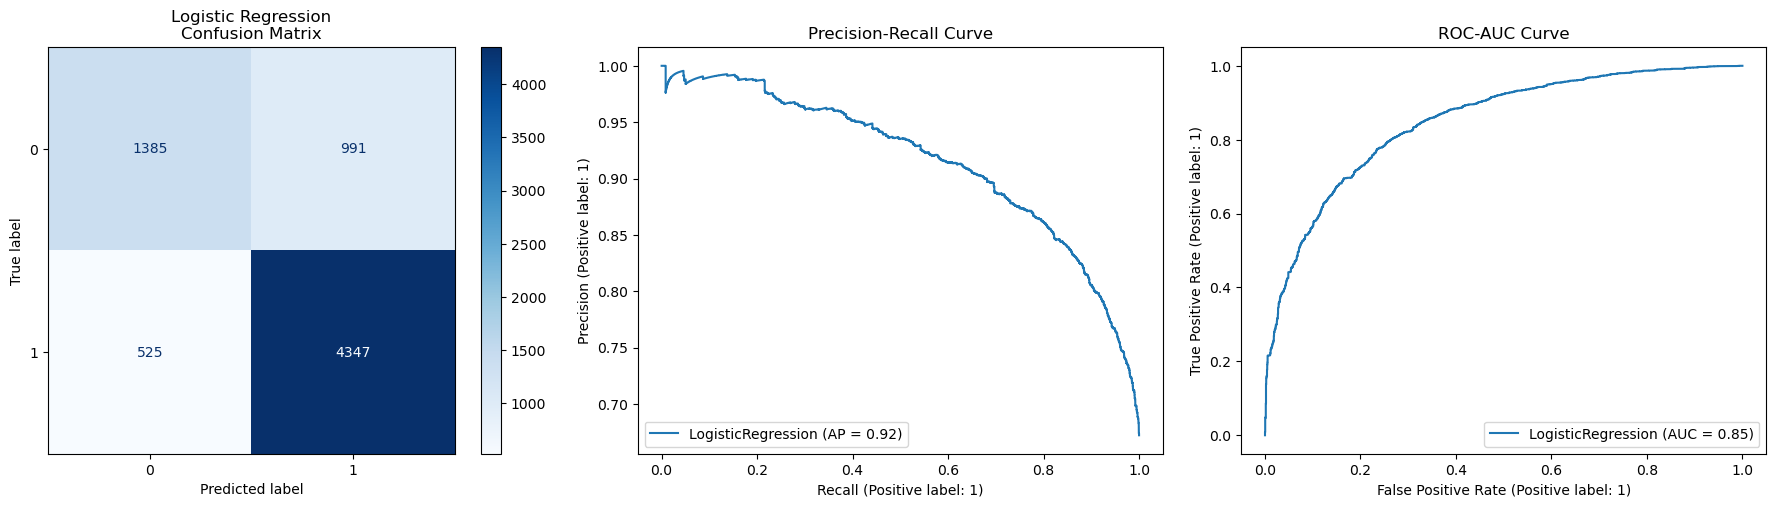

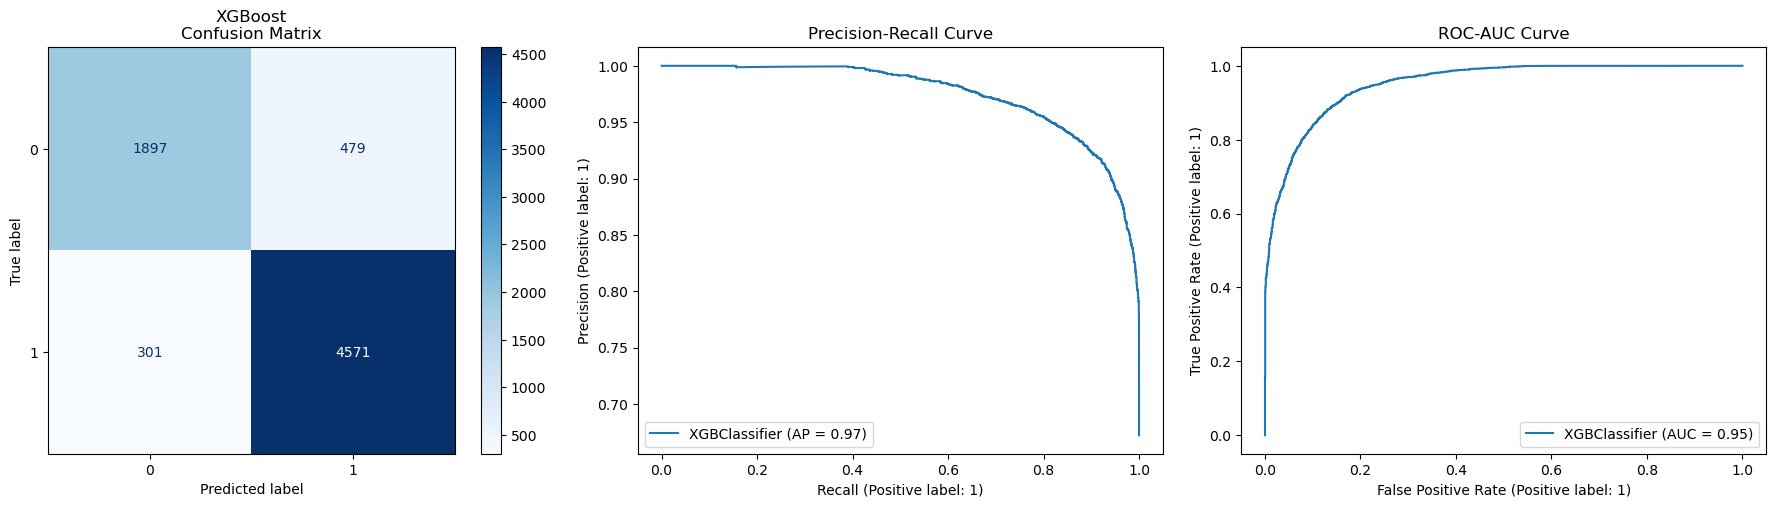

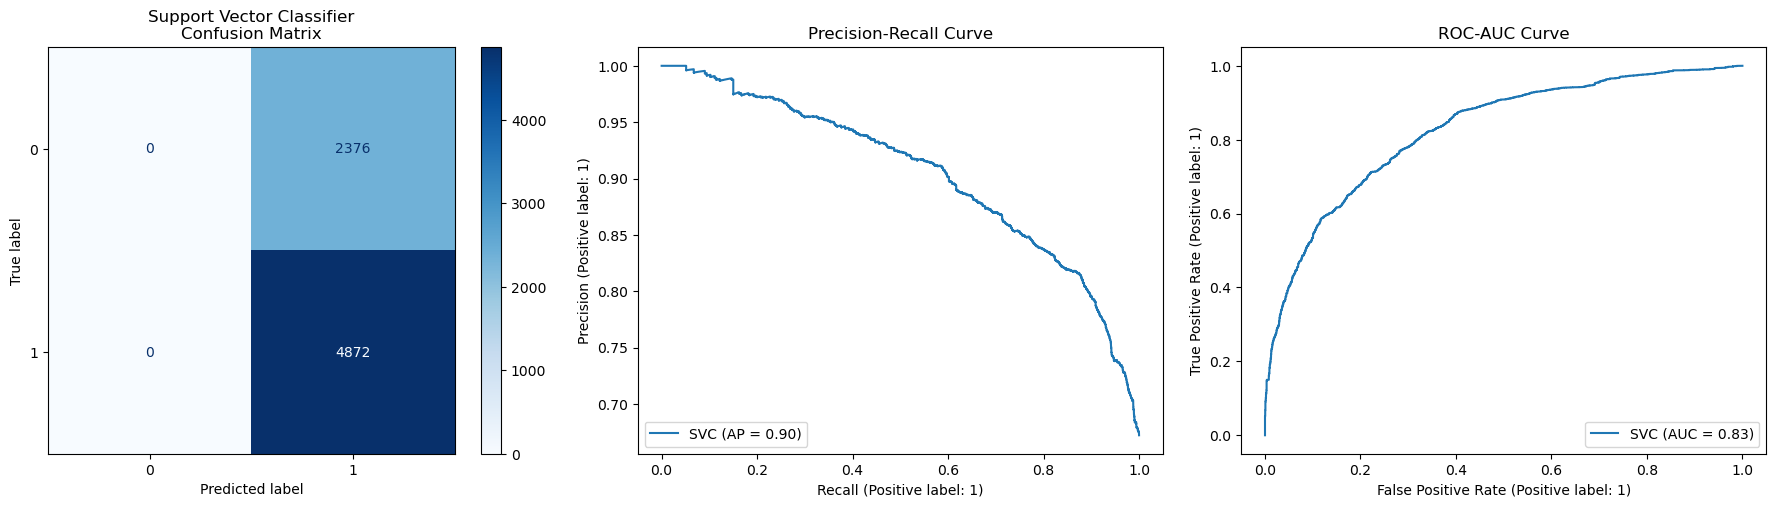

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay

# Logistic Regression
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(lr_model, X_test, y_test, ax=ax1, cmap=plt.cm.Blues)
ax1.set_title('Logistic Regression\nConfusion Matrix')

# Precision-Recall Curve
PrecisionRecallDisplay.from_estimator(lr_model, X_test, y_test, ax=ax2)
ax2.set_title('Precision-Recall Curve')

# ROC-AUC Curve
RocCurveDisplay.from_estimator(lr_model, X_test, y_test, ax=ax3)
ax3.set_title('ROC-AUC Curve')

plt.tight_layout()
plt.show()

# XGBoost
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(xgb_model, X_test, y_test, ax=ax1, cmap=plt.cm.Blues)
ax1.set_title('XGBoost\nConfusion Matrix')

# Precision-Recall Curve
PrecisionRecallDisplay.from_estimator(xgb_model, X_test, y_test, ax=ax2)
ax2.set_title('Precision-Recall Curve')

# ROC-AUC Curve
RocCurveDisplay.from_estimator(xgb_model, X_test, y_test, ax=ax3)
ax3.set_title('ROC-AUC Curve')

plt.tight_layout()
plt.show()

# SVC
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(svc_model, X_test, y_test, ax=ax1, cmap=plt.cm.Blues)
ax1.set_title('Support Vector Classifier\nConfusion Matrix')

# Precision-Recall Curve
PrecisionRecallDisplay.from_estimator(svc_model, X_test, y_test, ax=ax2)
ax2.set_title('Precision-Recall Curve')

# ROC-AUC Curve
RocCurveDisplay.from_estimator(svc_model, X_test, y_test, ax=ax3)
ax3.set_title('ROC-AUC Curve')

plt.tight_layout()
plt.show()

Logistic Regression
For Logistic Regression, we can tune the regularization strength (C) and the regularization type (penalty).

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10]
}

# Create a Logistic Regression instance
lr_model = LogisticRegression()

# Create a GridSearchCV instance
grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, scoring='roc_auc', cv=5, n_jobs=-1)

# Fit the GridSearchCV instance to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters for Logistic Regression:", best_params)

# Get the best estimator
best_lr_model = grid_search.best_estimator_

# Evaluate the best model on the test set
lr_pred = best_lr_model.predict(X_test)
lr_prob = best_lr_model.predict_proba(X_test)[:, 1]
lr_roc_auc = roc_auc_score(y_test, lr_prob)
print("ROC-AUC score for the best Logistic Regression model:", lr_roc_auc)

C:\Users\ytyyu\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ytyyu\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ytyyu\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ytyyu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solver = _

Best hyperparameters for Logistic Regression: {'C': 10, 'penalty': 'l2'}
ROC-AUC score for the best Logistic Regression model: 0.8472920657726692


C:\Users\ytyyu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


XGBoost
For XGBoost, we can tune the maximum depth of the trees (max_depth) and the learning rate (learning_rate).

In [21]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3]
}

# Create an XGBClassifier instance
xgb_model = XGBClassifier()

# Create a GridSearchCV instance
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='roc_auc', cv=5, n_jobs=-1)

# Fit the GridSearchCV instance to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters for XGBoost:", best_params)

# Get the best estimator
best_xgb_model = grid_search.best_estimator_

# Evaluate the best model on the test set
xgb_pred = best_xgb_model.predict(X_test)
xgb_prob = best_xgb_model.predict_proba(X_test)[:, 1]
xgb_roc_auc = roc_auc_score(y_test, xgb_prob)
print("ROC-AUC score for the best XGBoost model:", xgb_roc_auc)

Best hyperparameters for XGBoost: {'learning_rate': 0.3, 'max_depth': 7}
ROC-AUC score for the best XGBoost model: 0.9532574738214107


SVC
For SVC (Support Vector Classifier), we can tune the kernel type (kernel) and the regularization parameter (C).

In [22]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
}

# Create an SVC instance
svc_model = SVC()

# Create a GridSearchCV instance
grid_search = GridSearchCV(estimator=svc_model, param_grid=param_grid, scoring='roc_auc', cv=5, n_jobs=-1)

# Fit the GridSearchCV instance to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters for SVC:", best_params)

# Get the best estimator
best_svc_model = grid_search.best_estimator_

# Evaluate the best model on the test set
svc_pred = best_svc_model.predict(X_test)
svc_prob = best_svc_model.decision_function(X_test)
svc_roc_auc = roc_auc_score(y_test, svc_prob)
print("ROC-AUC score for the best SVC model:", svc_roc_auc)

Best hyperparameters for SVC: {'C': 0.1, 'kernel': 'linear'}
ROC-AUC score for the best SVC model: 0.8547875702150127


In [25]:
import hyperopt
from hyperopt import hp, fmin, tpe, STATUS_OK
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# Define the hyperparameter search space
space = {
    'max_depth': hp.quniform('max_depth', 2, 10, 1),
    'learning_rate': hp.loguniform('learning_rate', -5, -1),
    'n_estimators': hp.quniform('n_estimators', 100, 1000, 50),
    'gamma': hp.uniform('gamma', 0, 1),
    'reg_alpha': hp.uniform('reg_alpha', 0, 1),
    'reg_lambda': hp.uniform('reg_lambda', 0, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
    'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1)
}

# Define the objective function
def objective(params):
    model = XGBClassifier(
        max_depth=int(params['max_depth']),
        learning_rate=params['learning_rate'],
        n_estimators=int(params['n_estimators']),
        gamma=params['gamma'],
        reg_alpha=params['reg_alpha'],
        reg_lambda=params['reg_lambda'],
        colsample_bytree=params['colsample_bytree'],
        min_child_weight=int(params['min_child_weight'])
    )
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)[:, 1]
    score = roc_auc_score(y_test, y_prob)
    return {'loss': -score, 'status': STATUS_OK}

# Run the hyperparameter optimization
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=100)

# Print the best hyperparameters
print("Best hyperparameters:", best)

# Create the model with the best hyperparameters
best_model = XGBClassifier(
    max_depth=int(best['max_depth']),
    learning_rate=best['learning_rate'],
    n_estimators=int(best['n_estimators']),
    gamma=best['gamma'],
    reg_alpha=best['reg_alpha'],
    reg_lambda=best['reg_lambda'],
    colsample_bytree=best['colsample_bytree'],
    min_child_weight=int(best['min_child_weight'])
)

# Fit the best model
best_model.fit(X_train, y_train)

# Evaluate the best model on the test set
y_prob = best_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC score for the best XGBoost model:", roc_auc)

100%|█████████████████████████████████████████████| 100/100 [02:46<00:00,  1.66s/trial, best loss: -0.9578350987294952]
Best hyperparameters: {'colsample_bytree': 0.8759302866553039, 'gamma': 0.0019752279838513576, 'learning_rate': 0.040675710591335554, 'max_depth': 10.0, 'min_child_weight': 1.0, 'n_estimators': 900.0, 'reg_alpha': 0.7230749014558822, 'reg_lambda': 0.8679411465134443}
ROC-AUC score for the best XGBoost model: 0.9578350987294952


In [26]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Create an XGBClassifier instance
xgb_model = XGBClassifier(random_state=42)

# Fit the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
xgb_accuracy = accuracy_score(y_test, y_pred)
xgb_precision = precision_score(y_test, y_pred)
xgb_recall = recall_score(y_test, y_pred)
xgb_f1 = f1_score(y_test, y_pred)
xgb_roc_auc = roc_auc_score(y_test, y_prob)

# Print evaluation metrics
print("XGBoost:")
print("Accuracy:", xgb_accuracy)
print("Precision:", xgb_precision)
print("Recall:", xgb_recall)
print("F1-score:", xgb_f1)
print("ROC-AUC:", xgb_roc_auc)
print(classification_report(y_test, y_pred))

XGBoost:
Accuracy: 0.8923841059602649
Precision: 0.9051485148514852
Recall: 0.9382183908045977
F1-score: 0.9213868171739569
ROC-AUC: 0.9514736341244961
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      2376
           1       0.91      0.94      0.92      4872

    accuracy                           0.89      7248
   macro avg       0.88      0.87      0.88      7248
weighted avg       0.89      0.89      0.89      7248



In [27]:
import pandas as pd

model_metrics = {
    'Model': ['Logistic Regression', 'XGBoost', 'Support Vector Classifier (SVC)'],
    'Accuracy': [lr_accuracy, xgb_accuracy, svc_accuracy],
    'Precision': [lr_precision, xgb_precision, svc_precision],
    'Recall': [lr_recall, xgb_recall, svc_recall],
    'F1-Score': [lr_f1, xgb_f1, svc_f1],
    'ROC-AUC': [lr_roc_auc, xgb_roc_auc, svc_roc_auc]
}

summary_table = pd.DataFrame(model_metrics)
print(summary_table)

                             Model  Accuracy  Precision    Recall  F1-Score  \
0              Logistic Regression  0.790839   0.814350  0.892241  0.851518   
1                          XGBoost  0.892384   0.905149  0.938218  0.921387   
2  Support Vector Classifier (SVC)  0.672185   0.672185  1.000000  0.803960   

    ROC-AUC  
0  0.847292  
1  0.951474  
2  0.854788  
